## Vead:
* siin notebookis on valesti kasutatud mul 10e1 jne märgistusi, sest nad tegelikult on asi\*10\*\*power, ehk 10\*10\*\*power
  * seega todo: lükata 1e5 numbristamisele üle
* batch size ja epochide arv muutub, selleks et treenimine oleks kiirem, ei tohiks

In [1]:
%load_ext autoreload
%autoreload 2
%cd ..

c:\Users\troosma\Documents\Ylikool\6. semester\Bakatöö\bakatoo


In [142]:
import sys
import os

import numpy as np
import random
import tensorflow as tf

from tensorflow import keras
from keras import layers

from matplotlib import pyplot as plt
import seaborn as sns

from scripts.CustomCallbacks import CustomLogger
import scripts.utils as utils
import scripts.Slopes as Slopes

from tqdm import tqdm

utils.reset_seeds(0)

## 20-20 relu, const func, noise = 0.3 + 0.3X

In [150]:
def train_model_nb(trainX, nn_size=(20,20), optimizer=keras.optimizers.Adam(learning_rate=0.005, amsgrad=True), epochs=4000, batch_size=64, fn=lambda x: 0*x, reverse=False, seed=2002):
    utils.reset_seeds(seed)

    model = keras.Sequential([
        layers.Input(shape=(1,)),
        layers.Dense(units=nn_size[0], activation='relu', name="layer_1"),
        layers.Dense(units=nn_size[1], activation='relu', name="layer_2"),
        layers.Dense(units=2, activation='linear', name="layer_3")
    ])

    X = trainX
    y =  fn(X) + 0.3 * np.random.randn(len(X)) + 0.3 * X * np.random.randn(len(X))
    if reverse:
        y = fn(X)[::-1] + 0.3 * np.random.randn(len(X)) + \
            0.3 * X[::-1] * np.random.randn(len(X))        

    X_truth = np.linspace(-4, 14, 2000)
    ground_truth = X_truth * np.sin(X_truth)

    X_train, y_train = X, y

    model.compile(
        optimizer=optimizer,
        loss=utils.neg_log_likelihood,
    )

    h = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, verbose=0,
                  callbacks=[CustomLogger(100)], shuffle=True)
    return model, h, (X, y, X_truth, ground_truth)


def fn(X): return 0*X

## 10^6 andmepunkti (20-20 mudel)

Epoch:   0 | Loss: 1.73641e+00
Epoch: 100 | Loss: 1.50380e+00
Epoch: 200 | Loss: 1.50370e+00
model contains 25 breaks
63/63 [==============================] - 0s 2ms/step


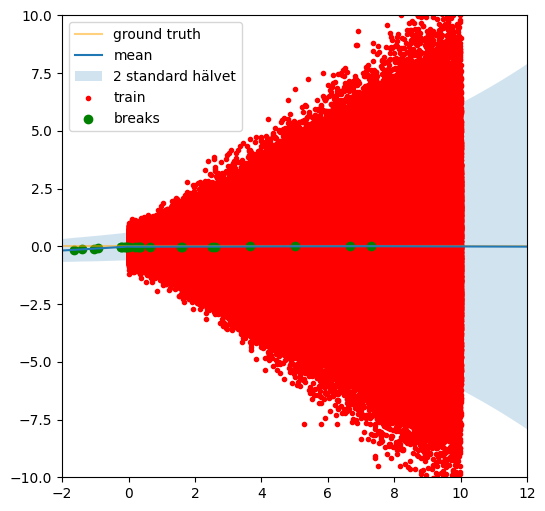

In [4]:
X_train_e6 = np.linspace(0, 10,10**6)
opt = keras.optimizers.Adam(learning_rate=0.003, amsgrad=True, epsilon=1e-3)

model_e6, h, (X_train_e6, y_train_e6, X_truth_e6, ground_truth_e6) = train_model_nb(X_train_e6, batch_size=4096, epochs=300)
utils.joonista_variance(model_e6, X_truth_e6, X_train_e6, y_train_e6, xlim=(-2, 12),
                  ylim=(-10, 10), ground_truth=lambda x: 0*x)

model contains 25 breaks
63/63 [==============================] - 0s 3ms/step


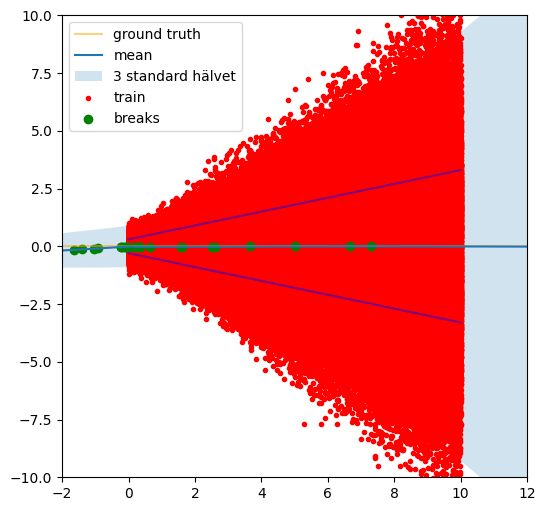

In [5]:
_a = np.linspace(0, 10, 100)
p = utils.joonista_variance(model_e6, X_truth_e6, X_train_e6, y_train_e6, xlim=(-2, 12),
                  ylim=(-10, 10), ground_truth=lambda x: 0*x, return_fig=True, n_variances=3)
p.plot(_a, 0.3+0.3*_a, color='purple')
p.plot(_a, -(0.3+0.3*_a), color='purple')

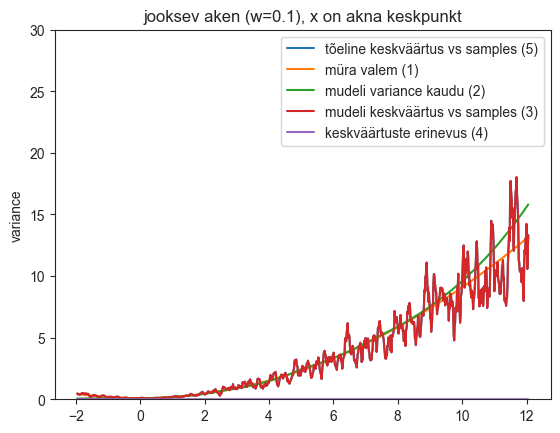

In [37]:
rmses_e6, fig_e6 = utils.joonista_rmses5x(model_e6, start=-2, end=12, steps=1000, fn=fn, akna_laius=0.1, return_fig=True)

## 10^5 andmepunkti

Epoch:   0 | Loss: 2.28188e+00
Epoch: 100 | Loss: 1.55314e+00
Epoch: 200 | Loss: 1.55281e+00
model contains 15 breaks
63/63 [==============================] - 0s 2ms/step


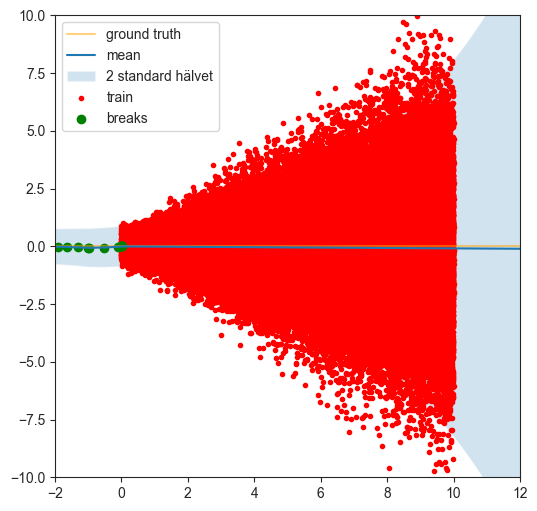

In [7]:
X_train_e5 = np.linspace(0, 10,10**5)
opt = keras.optimizers.Adam(learning_rate=0.003, amsgrad=True, epsilon=1e-3)

model_e5, h, (X_train_e5, y_train_e5, X_truth_e5, ground_truth_e5) = train_model_nb(X_train_e5, batch_size=4096, epochs=300)
utils.joonista_variance(model_e5, X_truth_e5, X_train_e5, y_train_e5, xlim=(-2, 12),
                  ylim=(-10, 10), ground_truth=lambda x: 0*x)

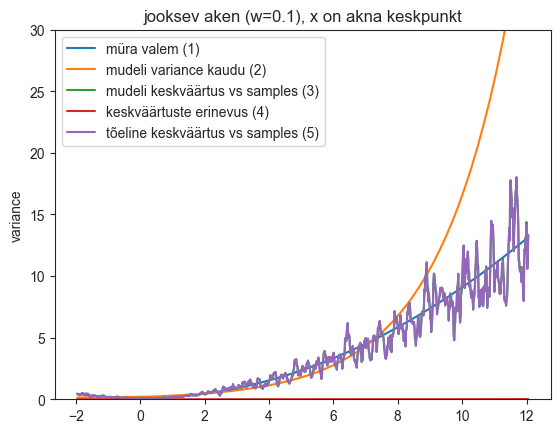

In [28]:
rmses_e5, fig_e5 = utils.joonista_rmses5x(model_e5, start=-2, end=12, steps=1000, fn=fn, akna_laius=0.1, return_fig=True)

## 10^4 andmepunkti

Epoch:   0 | Loss: 1.85787e+00
Epoch: 100 | Loss: 1.50340e+00
Epoch: 200 | Loss: 1.50450e+00
Epoch: 300 | Loss: 1.50165e+00
Epoch: 400 | Loss: 1.50162e+00
model contains 21 breaks
63/63 [==============================] - 0s 2ms/step


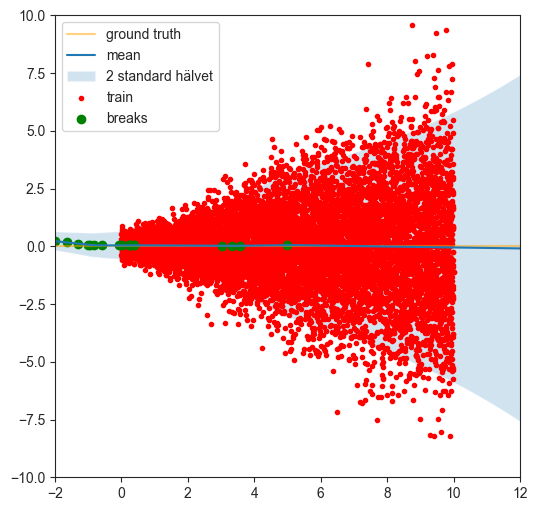

In [9]:
X_train_e4 = np.linspace(0, 10,10**4)
opt = keras.optimizers.Adam(learning_rate=0.003, amsgrad=True, epsilon=1e-3)

model_e4, h, (X_train_e4, y_train_e4, X_truth_e4, ground_truth_e4) = train_model_nb(X_train_e4, batch_size=128, epochs=500)
utils.joonista_variance(model_e4, X_truth_e4, X_train_e4, y_train_e4, xlim=(-2, 12),
                  ylim=(-10, 10), ground_truth=lambda x: 0*x)

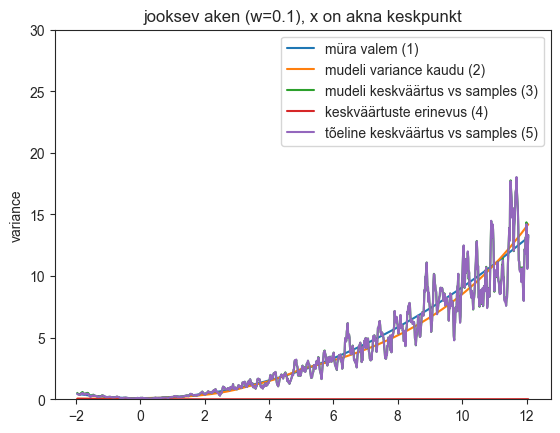

In [29]:
rmses_e4, fig_e4 = utils.joonista_rmses5x(model_e4, start=-2, end=12, steps=1000, fn=fn, akna_laius=0.1, return_fig=True)

## 10^3 andmepunkti

Epoch:   0 | Loss: 2.37630e+00
Epoch: 100 | Loss: 1.50939e+00
Epoch: 200 | Loss: 1.51148e+00
Epoch: 300 | Loss: 1.51106e+00
Epoch: 400 | Loss: 1.50834e+00
Epoch: 500 | Loss: 1.51039e+00
Epoch: 600 | Loss: 1.50748e+00
Epoch: 700 | Loss: 1.50526e+00
model contains 24 breaks
63/63 [==============================] - 0s 2ms/step


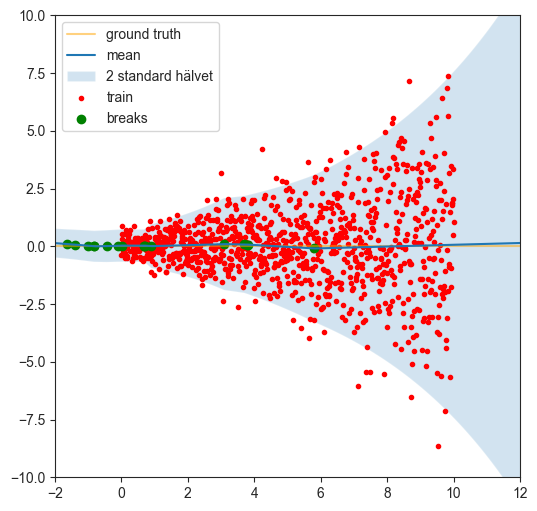

In [11]:
X_train_e3 = np.linspace(0, 10,10**3)
opt = keras.optimizers.Adam(learning_rate=0.003, amsgrad=True, epsilon=1e-3)

model_e3, h, (X_train_e3, y_train_e3, X_truth_e3, ground_truth_e3) = train_model_nb(X_train_e3, batch_size=32, epochs=800)
utils.joonista_variance(model_e3, X_truth_e3, X_train_e3, y_train_e3, xlim=(-2, 12),
                  ylim=(-10, 10), ground_truth=lambda x: 0*x)

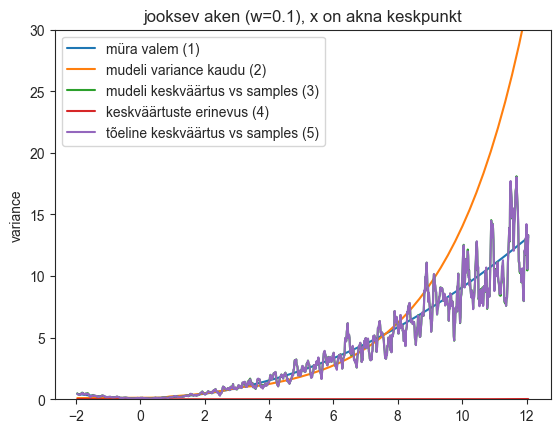

In [30]:
rmses_e3, fig_e3 = utils.joonista_rmses5x(model_e3, start=-2, end=12, steps=1000, fn=fn, akna_laius=0.1, return_fig=True)

model contains 24 breaks
63/63 [==============================] - 0s 2ms/step


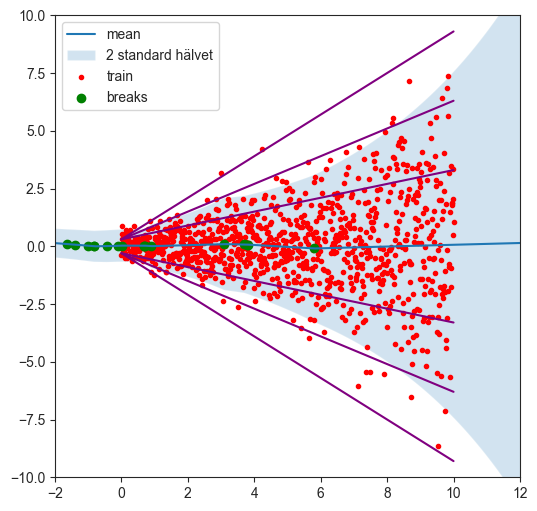

In [13]:
_p = utils.joonista_variance(model_e3, X_truth_e3, X_train_e3, y_train_e3, xlim=(-2, 12), ylim=(-10,10), return_fig=True,)
_p.plot(_a, 0.3+0.3*_a, color='purple')
_p.plot(_a, 0.3+0.3*2*_a, color='purple')
_p.plot(_a, 0.3+0.3*3*_a, color='purple')

_p.plot(_a, -(0.3+0.3*_a), color='purple')
_p.plot(_a, -(0.3+0.3*2*_a), color='purple')
_p.plot(_a, -(0.3+0.3*3*_a), color='purple')
_p.show()

## 10^2 andmepunkti

Epoch:   0 | Loss: 3.34519e+00
Epoch: 100 | Loss: 1.45022e+00
Epoch: 200 | Loss: 1.38151e+00
Epoch: 300 | Loss: 1.35225e+00
Epoch: 400 | Loss: 1.35194e+00
Epoch: 500 | Loss: 1.35546e+00
Epoch: 600 | Loss: 1.32841e+00
Epoch: 700 | Loss: 1.31278e+00
Epoch: 800 | Loss: 1.30541e+00
Epoch: 900 | Loss: 1.30638e+00
model contains 23 breaks
63/63 [==============================] - 0s 2ms/step


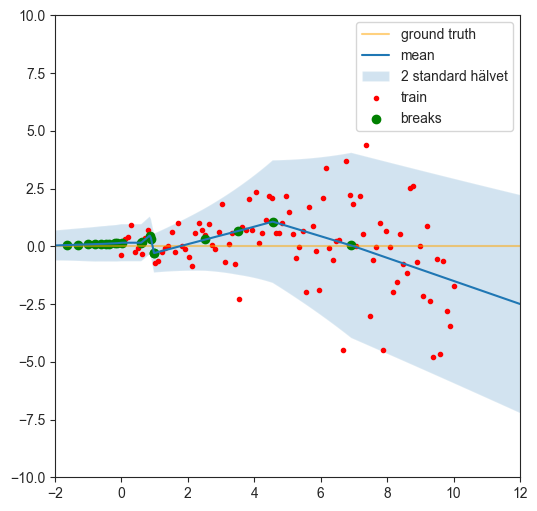

In [14]:
X_train_e2 = np.linspace(0, 10,10**2)
opt = keras.optimizers.Adam(learning_rate=0.003, amsgrad=True, epsilon=1e-3)

model_e2, h, (X_train_e2, y_train_e2, X_truth_e2, ground_truth_e2) = train_model_nb(X_train_e2, batch_size=8, epochs=1000)
utils.joonista_variance(model_e2, X_truth_e2, X_train_e2, y_train_e2, xlim=(-2, 12),
                  ylim=(-10, 10), ground_truth=lambda x: 0*x)

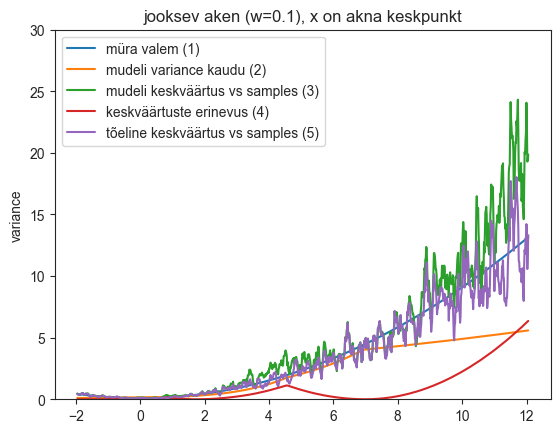

In [31]:
rmses_e2, fig_e2 = utils.joonista_rmses5x(model_e2, start=-2, end=12, steps=1000, fn=fn, akna_laius=0.1, return_fig=True)

## 10^1 andmepunkti (10tk)

Epoch:   0 | Loss: 7.49993e+00
Epoch: 100 | Loss: 1.95617e+00
Epoch: 200 | Loss: 1.29186e+00
Epoch: 300 | Loss: 6.57213e-01
Epoch: 400 | Loss: 4.44777e-01
Epoch: 500 | Loss: 2.64338e-01
Epoch: 600 | Loss: 1.01155e-01
Epoch: 700 | Loss: 1.73706e-01
Epoch: 800 | Loss: 2.27093e-01
Epoch: 900 | Loss: 2.16340e-01
model contains 20 breaks
63/63 [==============================] - 0s 2ms/step


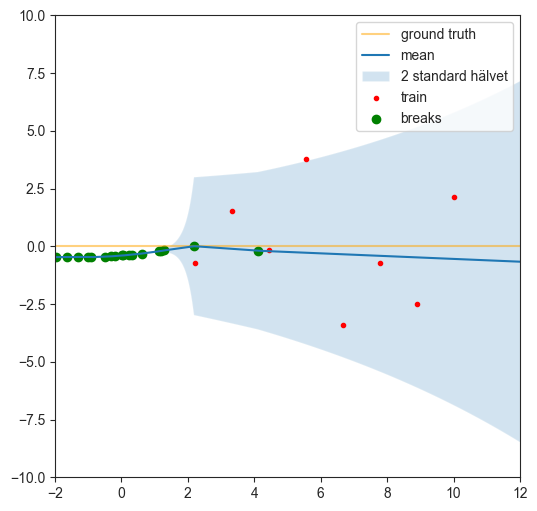

In [16]:
X_train_e1 = np.linspace(0, 10,10**1)
opt = keras.optimizers.Adam(learning_rate=0.003, amsgrad=True, epsilon=1e-3)

model_e1, h, (X_train_e1, y_train_e1, X_truth_e1, ground_truth_e1) = train_model_nb(X_train_e1, batch_size=4, epochs=1000)
utils.joonista_variance(model_e1, X_truth_e1, X_train_e1, y_train_e1, xlim=(-2, 12),
                  ylim=(-10, 10), ground_truth=lambda x: 0*x)

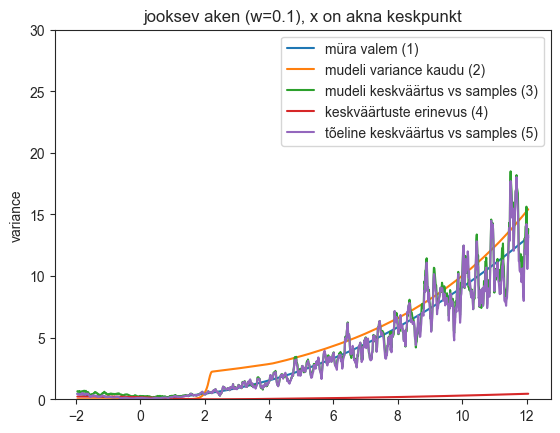

In [32]:
rmses_e1, fig_e1 = utils.joonista_rmses5x(model_e1, start=-2, end=12, steps=1000, fn=fn, akna_laius=0.1, return_fig=True)

## 5 andmepunkti

Epoch:   0 | Loss: 1.36291e+01
Epoch: 100 | Loss: 4.06624e-02
Epoch: 200 | Loss: -1.75752e+00
Epoch: 300 | Loss: -1.50011e+00
Epoch: 400 | Loss: -2.47694e+00
Epoch: 500 | Loss: -1.38821e+00
Epoch: 600 | Loss: -2.12941e+00
Epoch: 700 | Loss: -2.73603e+00
Epoch: 800 | Loss: -1.47715e+00
Epoch: 900 | Loss: -1.89532e+00
model contains 24 breaks
63/63 [==============================] - 0s 2ms/step


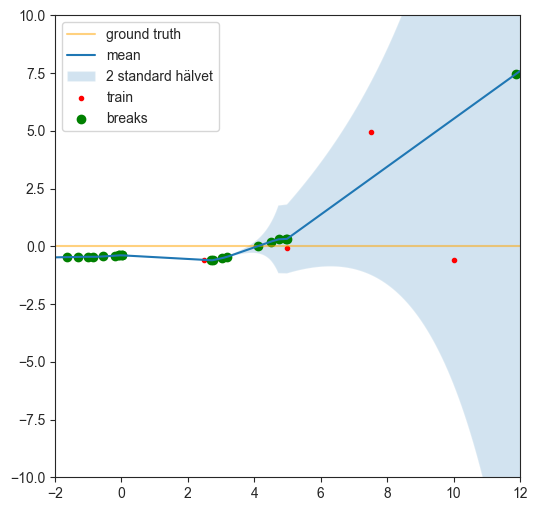

In [18]:
X_train_viis = np.linspace(0, 10,5)
opt = keras.optimizers.Adam(learning_rate=0.003, amsgrad=True, epsilon=1e-3)

model_viis, h, (X_train_viis, y_train_viis, X_truth_viis, ground_truth_viis) = train_model_nb(X_train_viis, batch_size=2, epochs=1000)
utils.joonista_variance(model_viis, X_truth_viis, X_train_viis, y_train_viis, xlim=(-2, 12),
                  ylim=(-10, 10), ground_truth=lambda x: 0*x)

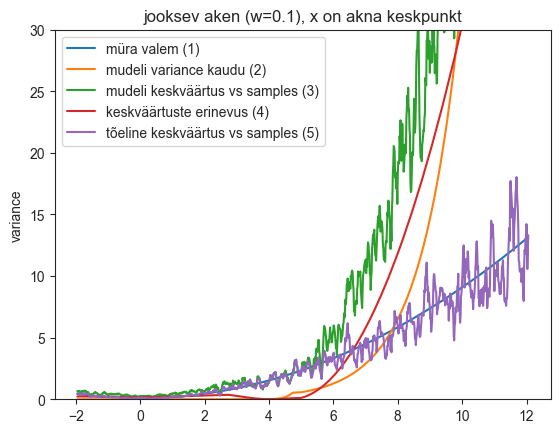

In [133]:
rmses_viis, fig_viis = utils.joonista_rmses5x(model_viis, start=-2, end=12, steps=1000, fn=fn, akna_laius=0.1, return_fig=True)

### Plottide salvestamine

In [36]:
fig_e6.savefig('./plots/rmses_24_03/e6.png')
fig_e5.savefig('./plots/rmses_24_03/e5.png')
fig_e4.savefig('./plots/rmses_24_03/e4.png')
fig_e3.savefig('./plots/rmses_24_03/e3.png')
fig_e2.savefig('./plots/rmses_24_03/e2.png')
fig_e1.savefig('./plots/rmses_24_03/e1.png')
fig_viis.savefig('./plots/rmses_24_03/e0.png')

## Treening- vs testviga

In [106]:
dset_sizes = [5, 10**1, 10**2, 10**3, 10**4, 10**5, 10**6]
x_trains = [X_train_viis, X_train_e1, X_train_e2, X_train_e3, X_train_e4, X_train_e5, X_train_e6]
y_trains = [y_train_viis, y_train_e1, y_train_e2, y_train_e3, y_train_e4, y_train_e5, y_train_e6]
X_truths = [X_truth_viis, X_truth_e1, X_truth_e2, X_truth_e3, X_truth_e4, X_truth_e5, X_truth_e6]
ground_truths = [ground_truth_viis, ground_truth_e1, ground_truth_e2, ground_truth_e3, ground_truth_e4, ground_truth_e5, ground_truth_e6]
models = [model_viis, model_e1, model_e2, model_e3, model_e4, model_e5, model_e6]
rmses = [rmses_viis, rmses_e1, rmses_e2, rmses_e3, rmses_e4, rmses_e5, rmses_e6]

In [51]:
# treeningvead saab otse model.evaluate abil koos treeningdataga
treening_vead = []
for idx, m in enumerate(models):
    treening_vead.append(m.evaluate(x_trains[idx], y_trains[idx], verbose=0))
treening_vead

[-2.321530342102051,
 0.39580243825912476,
 1.2757235765457153,
 1.500555396080017,
 1.503997802734375,
 1.5532424449920654,
 1.5036041736602783]

In [79]:
# testvead saame samadest kohtadest mõõtes. Kui andmepunkte on vähe, siis korrutame andmepunktid nii palju kordi, et oleks vähemalt 10^5
utils.reset_seeds()
test_vead = []
goal_test = 10**5
for idx, m in enumerate(models):
    print(f"Oleme mudelil millel {dset_sizes[idx]} andmepunkti")
    
    if len(x_trains[idx]) < goal_test:
        uus_x = np.repeat(x_trains[idx], goal_test/len(x_trains[idx]))
    else:
        uus_x = x_trains[idx]
    y_test = fn(uus_x) + 0.3*np.random.randn(len(uus_x)) + 0.3*uus_x*np.random.randn(len(uus_x))
    viga = m.evaluate(uus_x, y_test, verbose=True)

    test_vead.append(viga)
test_vead

Oleme mudelil millel 5 andmepunkti
3125/3125 [==============================] - 8s 3ms/step - loss: 3558.1606
Oleme mudelil millel 10 andmepunkti
3125/3125 [==============================] - 8s 2ms/step - loss: 474.4238
Oleme mudelil millel 100 andmepunkti
3125/3125 [==============================] - 9s 3ms/step - loss: 1.7887
Oleme mudelil millel 1000 andmepunkti
3125/3125 [==============================] - 7s 2ms/step - loss: 1.5221
Oleme mudelil millel 10000 andmepunkti
3125/3125 [==============================] - 7s 2ms/step - loss: 1.5095
Oleme mudelil millel 100000 andmepunkti
3125/3125 [==============================] - 7s 2ms/step - loss: 1.5573
Oleme mudelil millel 1000000 andmepunkti
31250/31250 [==============================] - 77s 2ms/step - loss: 1.5016


[3558.16064453125,
 474.4237976074219,
 1.7887109518051147,
 1.5220985412597656,
 1.5095142126083374,
 1.5573475360870361,
 1.5015842914581299]

In [132]:
# map those tuples into strings
s_treening_vead = list(map(lambda x: str(x), treening_vead))
s_test_vead = list(map(lambda x: str(x), test_vead))
s_dset_sizes = list(map(lambda x: str(x), dset_sizes))

# print them, in the format ds_size, train_error, test_error
print(f"{'dset':>10}, {'train error':>10}, {'test error':>10}" )
for i in range(len(s_dset_sizes)):
    print(f"{s_dset_sizes[i]:>10}, {s_treening_vead[i]:>10.6}, {s_test_vead[i]:>10.6}" )

      dset, train error, test error
         5,     -2.321,     3558.1
        10,     0.3958,     474.42
       100,     1.2757,     1.7887
      1000,     1.5005,     1.5220
     10000,     1.5039,     1.5095
    100000,     1.5532,     1.5573
   1000000,     1.5036,     1.5015


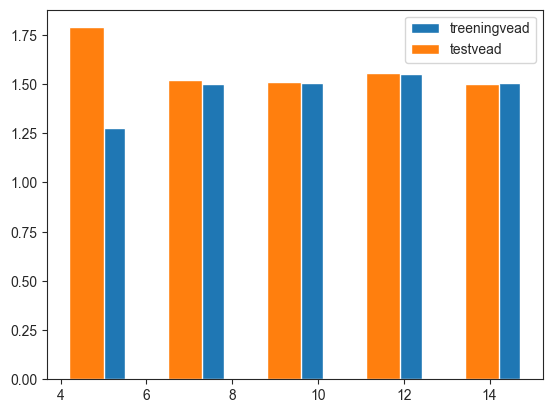

In [108]:
plt.bar(np.log(dset_sizes[2:])+0.5, treening_vead[2:], label="treeningvead")
plt.bar(np.log(dset_sizes[2:]), test_vead[2:], label="testvead")
plt.legend()

## Ülevalolev, aga korduvalt jooksutatav et keskmistada

In [159]:
param_dict = {
    5 :{
        'batch_size':2, 'epochs':1000,
    },
    10 : {
        'batch_size':4, 'epochs':1000,
    },
    100 : {
        'batch_size':16, 'epochs':1000,
    },
    1000 : {
        'batch_size':64, 'epochs':800,
    },
    10000 : {
        'batch_size':256, 'epochs':500,
    },
    100000 : {
        'batch_size':4096, 'epochs':300,
    },
    1000000 : {
        'batch_size':8192, 'epochs':300,
    },
}
for k, v in param_dict.items():
    print(v['batch_size']/k)

0.4
0.4
0.16
0.064
0.0256
0.04096
0.008192


  0%|          | 0/7 [00:00<?, ?it/s]

Epoch:   0 | Loss: 2.79093e+00
Epoch: 100 | Loss: -4.99831e-01
Epoch: 200 | Loss: -3.09522e+00
Epoch: 300 | Loss: -2.90225e+00
Epoch: 400 | Loss: -3.64412e+00
Epoch: 500 | Loss: -1.75607e+00
Epoch: 600 | Loss: -2.58678e+00
Epoch: 700 | Loss: -3.60614e+00
Epoch: 800 | Loss: -4.41692e+00
Epoch: 900 | Loss: -4.07156e+00
Epoch:   0 | Loss: 1.19670e+01
Epoch: 100 | Loss: 9.32976e-01
Epoch: 200 | Loss: -4.43004e-01
Epoch: 300 | Loss: -1.69727e+00
Epoch: 400 | Loss: -1.69900e+00
Epoch: 500 | Loss: -1.14823e+00
Epoch: 600 | Loss: -9.64488e-01
Epoch: 700 | Loss: -2.21745e+00
Epoch: 800 | Loss: -1.26771e+00
Epoch: 900 | Loss: -2.96556e+00
Epoch:   0 | Loss: 2.72921e+01
Epoch: 100 | Loss: 3.69256e-01
Epoch: 200 | Loss: -8.42232e-01
Epoch: 300 | Loss: -3.68421e-01
Epoch: 400 | Loss: -1.60269e+00
Epoch: 500 | Loss: -1.39268e+00
Epoch: 600 | Loss: -1.14486e+00
Epoch: 700 | Loss: -1.90282e+00
Epoch: 800 | Loss: -1.52239e+00
Epoch: 900 | Loss: -2.43880e+00
Epoch:   0 | Loss: 3.43080e+00
Epoch: 100 | L

 14%|█▍        | 1/7 [01:18<07:52, 78.81s/it]

Epoch:   0 | Loss: 2.23008e+01
Epoch: 100 | Loss: 1.11918e+00
Epoch: 200 | Loss: 1.10071e+00
Epoch: 300 | Loss: 1.10028e+00
Epoch: 400 | Loss: 1.09036e+00
Epoch: 500 | Loss: 1.08746e+00
Epoch: 600 | Loss: 1.05039e+00
Epoch: 700 | Loss: 1.00224e+00
Epoch: 800 | Loss: 8.93962e-01
Epoch: 900 | Loss: 7.28099e-01
Epoch:   0 | Loss: 1.16484e+01
Epoch: 100 | Loss: 5.47194e-01
Epoch: 200 | Loss: 2.26711e-01
Epoch: 300 | Loss: 5.63463e-01
Epoch: 400 | Loss: 6.07216e-02
Epoch: 500 | Loss: -4.91906e-01
Epoch: 600 | Loss: -6.74166e-01
Epoch: 700 | Loss: -6.16715e-01
Epoch: 800 | Loss: -8.02942e-01
Epoch: 900 | Loss: 4.42545e+00
Epoch:   0 | Loss: 3.06444e+00
Epoch: 100 | Loss: -2.87786e-01
Epoch: 200 | Loss: 7.35406e-01
Epoch: 300 | Loss: -7.37796e-01
Epoch: 400 | Loss: -2.02187e-01
Epoch: 500 | Loss: -9.96912e-01
Epoch: 600 | Loss: -1.22302e+00
Epoch: 700 | Loss: -1.64346e+00
Epoch: 800 | Loss: -2.16284e-01
Epoch: 900 | Loss: -1.61912e+00
Epoch:   0 | Loss: 2.03455e+00
Epoch: 100 | Loss: -9.37620

 29%|██▊       | 2/7 [02:38<06:35, 79.09s/it]

Epoch:   0 | Loss: 2.26960e+00
Epoch: 100 | Loss: 1.46278e+00
Epoch: 200 | Loss: 1.42895e+00
Epoch: 300 | Loss: 1.41020e+00
Epoch: 400 | Loss: 1.41935e+00
Epoch: 500 | Loss: 1.38525e+00
Epoch: 600 | Loss: 1.38709e+00
Epoch: 700 | Loss: 1.38332e+00
Epoch: 800 | Loss: 1.37947e+00
Epoch: 900 | Loss: 1.36788e+00
Epoch:   0 | Loss: 2.26485e+00
Epoch: 100 | Loss: 1.40361e+00
Epoch: 200 | Loss: 1.38032e+00
Epoch: 300 | Loss: 1.36395e+00
Epoch: 400 | Loss: 1.34628e+00
Epoch: 500 | Loss: 1.33367e+00
Epoch: 600 | Loss: 1.32020e+00
Epoch: 700 | Loss: 1.30997e+00
Epoch: 800 | Loss: 1.32148e+00
Epoch: 900 | Loss: 1.31611e+00
Epoch:   0 | Loss: 2.47929e+00
Epoch: 100 | Loss: 1.60077e+00
Epoch: 200 | Loss: 1.57603e+00
Epoch: 300 | Loss: 1.56985e+00
Epoch: 400 | Loss: 1.55680e+00
Epoch: 500 | Loss: 1.56081e+00
Epoch: 600 | Loss: 1.54509e+00
Epoch: 700 | Loss: 1.53908e+00
Epoch: 800 | Loss: 1.53903e+00
Epoch: 900 | Loss: 1.52465e+00
Epoch:   0 | Loss: 1.73611e+01
Epoch: 100 | Loss: 1.83144e+00
Epoch: 2

 43%|████▎     | 3/7 [04:50<06:53, 103.29s/it]

Epoch:   0 | Loss: 4.68728e+00
Epoch: 100 | Loss: 1.48334e+00
Epoch: 200 | Loss: 1.48331e+00
Epoch: 300 | Loss: 1.48224e+00
Epoch: 400 | Loss: 1.48167e+00
Epoch: 500 | Loss: 1.48357e+00
Epoch: 600 | Loss: 1.48248e+00
Epoch: 700 | Loss: 1.48332e+00
Epoch:   0 | Loss: 1.86075e+00
Epoch: 100 | Loss: 1.46175e+00
Epoch: 200 | Loss: 1.45977e+00
Epoch: 300 | Loss: 1.45871e+00
Epoch: 400 | Loss: 1.45714e+00
Epoch: 500 | Loss: 1.45710e+00
Epoch: 600 | Loss: 1.45627e+00
Epoch: 700 | Loss: 1.46124e+00
Epoch:   0 | Loss: 2.03672e+00
Epoch: 100 | Loss: 1.53367e+00
Epoch: 200 | Loss: 1.53503e+00
Epoch: 300 | Loss: 1.53932e+00
Epoch: 400 | Loss: 1.54491e+00
Epoch: 500 | Loss: 1.54096e+00
Epoch: 600 | Loss: 1.53471e+00
Epoch: 700 | Loss: 1.53386e+00
Epoch:   0 | Loss: 1.88748e+00
Epoch: 100 | Loss: 1.55682e+00
Epoch: 200 | Loss: 1.55389e+00
Epoch: 300 | Loss: 1.55945e+00
Epoch: 400 | Loss: 1.55480e+00
Epoch: 500 | Loss: 1.55382e+00
Epoch: 600 | Loss: 1.55431e+00
Epoch: 700 | Loss: 1.55262e+00
Epoch:  

 57%|█████▋    | 4/7 [07:43<06:32, 130.80s/it]

Epoch:   0 | Loss: 2.34170e+00
Epoch: 100 | Loss: 1.49050e+00
Epoch: 200 | Loss: 1.49022e+00
Epoch: 300 | Loss: 1.48830e+00
Epoch: 400 | Loss: 1.48829e+00


c:\Users\troosma\Documents\Ylikool\6. semester\Bakatöö\bakatoo\scripts\utils.py:318: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()


Epoch:   0 | Loss: 1.75146e+00
Epoch: 100 | Loss: 1.49656e+00
Epoch: 200 | Loss: 1.49616e+00
Epoch: 300 | Loss: 1.49824e+00
Epoch: 400 | Loss: 1.49666e+00
Epoch:   0 | Loss: 1.67495e+00
Epoch: 100 | Loss: 1.52167e+00
Epoch: 200 | Loss: 1.52187e+00
Epoch: 300 | Loss: 1.52538e+00
Epoch: 400 | Loss: 1.52167e+00
Epoch:   0 | Loss: 2.38591e+00
Epoch: 100 | Loss: 1.51983e+00
Epoch: 200 | Loss: 1.51740e+00
Epoch: 300 | Loss: 1.51613e+00
Epoch: 400 | Loss: 1.51796e+00
Epoch:   0 | Loss: 1.85116e+00
Epoch: 100 | Loss: 1.50298e+00
Epoch: 200 | Loss: 1.50397e+00
Epoch: 300 | Loss: 1.50344e+00
Epoch: 400 | Loss: 1.50303e+00


 71%|███████▏  | 5/7 [13:08<06:42, 201.02s/it]

Epoch:   0 | Loss: 1.82252e+00
Epoch: 100 | Loss: 1.50320e+00
Epoch: 200 | Loss: 1.50271e+00
Epoch:   0 | Loss: 1.72618e+00
Epoch: 100 | Loss: 1.49979e+00
Epoch: 200 | Loss: 1.49909e+00
Epoch:   0 | Loss: 1.70864e+00
Epoch: 100 | Loss: 1.50957e+00
Epoch: 200 | Loss: 1.50735e+00
Epoch:   0 | Loss: 2.22990e+00
Epoch: 100 | Loss: 1.50845e+00
Epoch: 200 | Loss: 1.50816e+00
Epoch:   0 | Loss: 1.83862e+00
Epoch: 100 | Loss: 1.49822e+00
Epoch: 200 | Loss: 1.49797e+00


 86%|████████▌ | 6/7 [16:57<03:30, 210.32s/it]

Epoch:   0 | Loss: 1.58636e+00
Epoch: 100 | Loss: 1.50163e+00
Epoch: 200 | Loss: 1.50144e+00
Epoch:   0 | Loss: 1.72886e+00
Epoch: 100 | Loss: 1.50381e+00
Epoch: 200 | Loss: 1.50383e+00
Epoch:   0 | Loss: 2.79363e+00
Epoch: 100 | Loss: 1.50200e+00
Epoch: 200 | Loss: 1.50153e+00
Epoch:   0 | Loss: 1.65023e+00
Epoch: 100 | Loss: 1.50042e+00
Epoch: 200 | Loss: 1.50038e+00
Epoch:   0 | Loss: 1.96331e+00
Epoch: 100 | Loss: 1.50407e+00
Epoch: 200 | Loss: 1.50395e+00


100%|██████████| 7/7 [38:44<00:00, 332.06s/it]


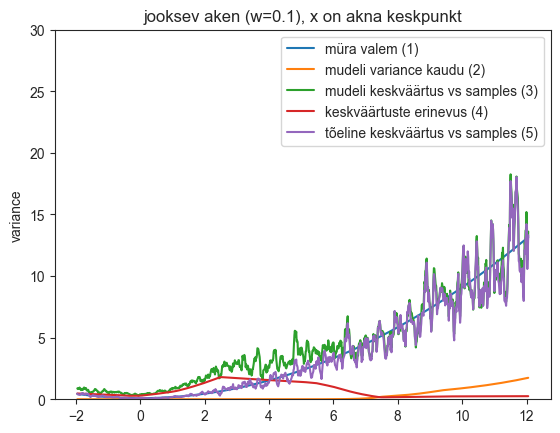

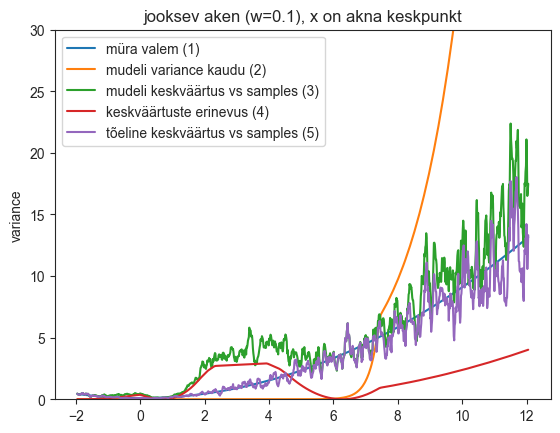

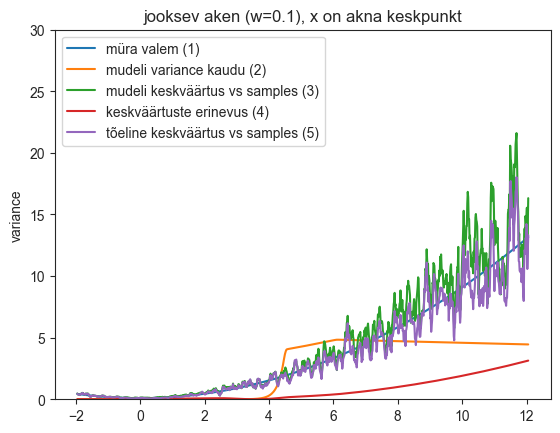

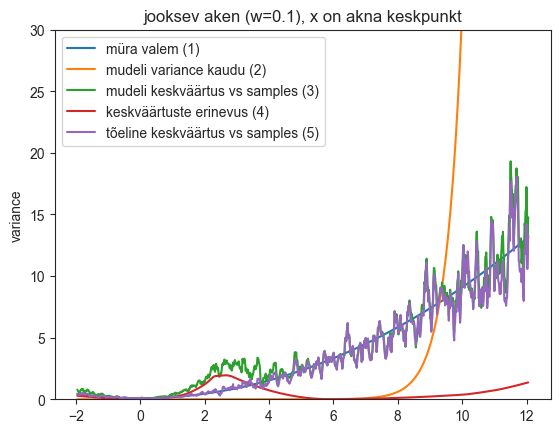

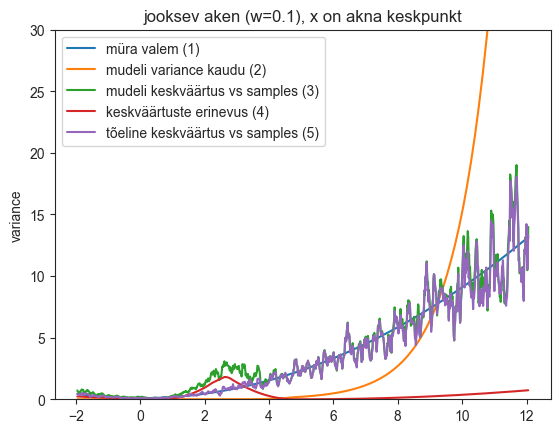

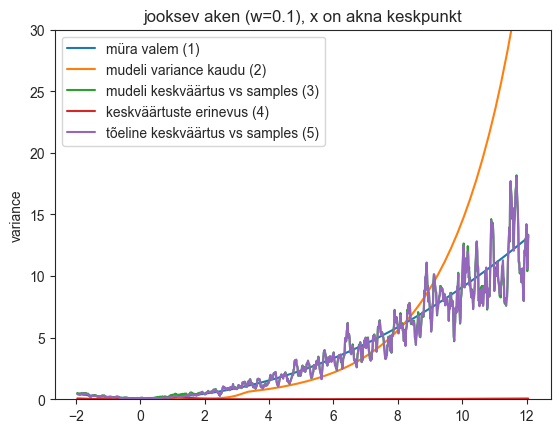

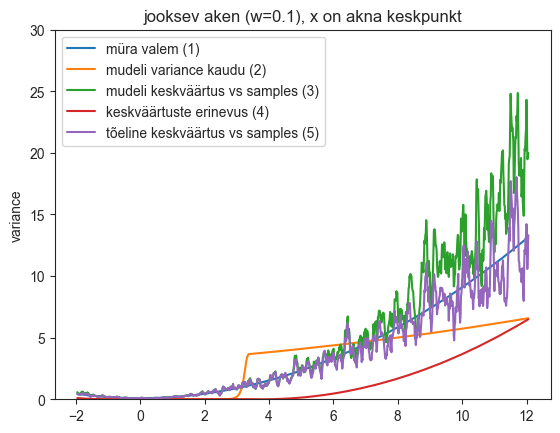

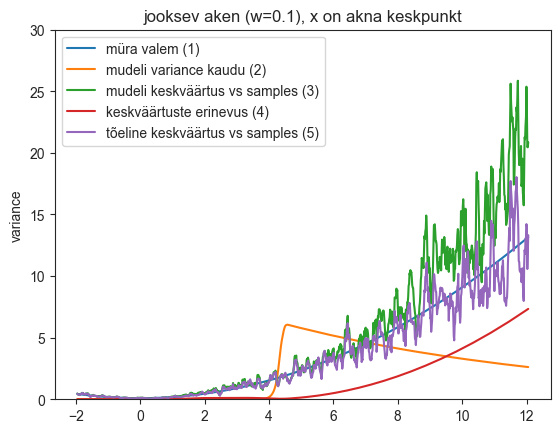

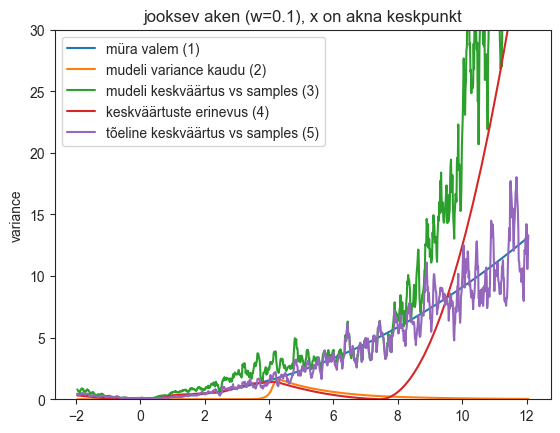

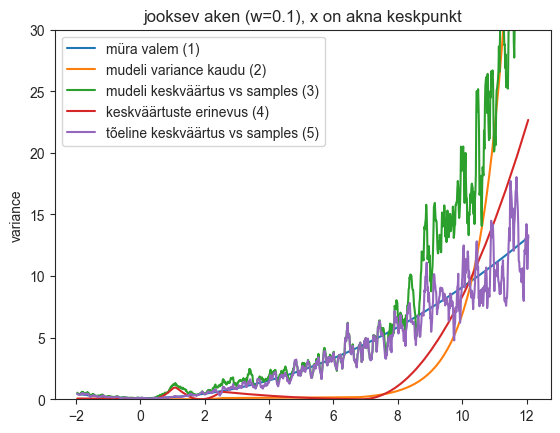

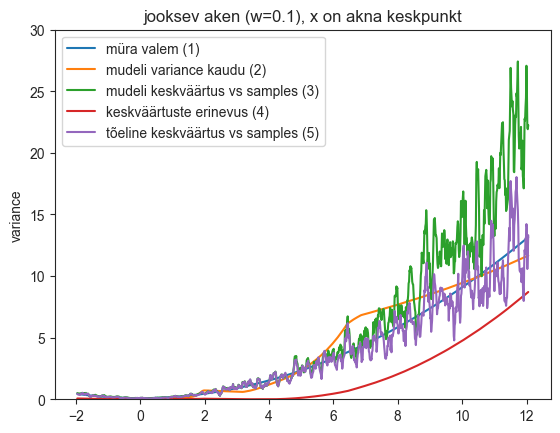

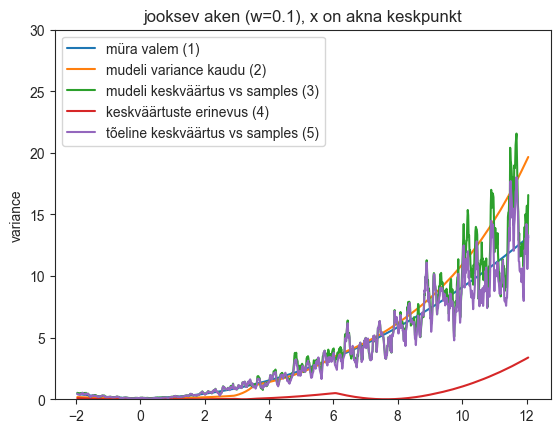

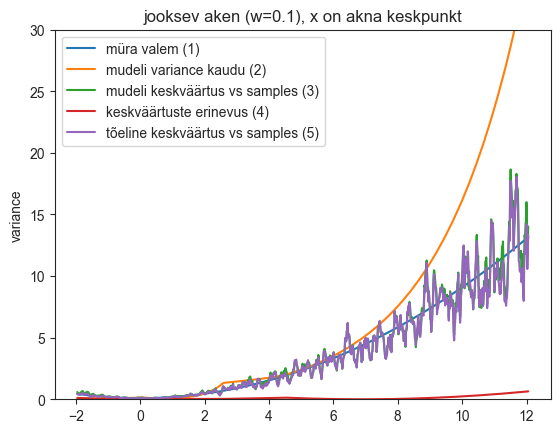

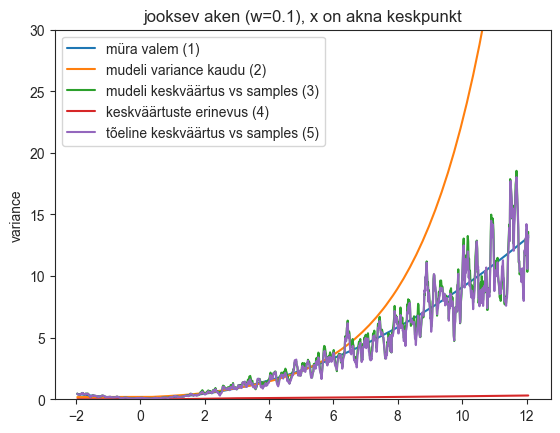

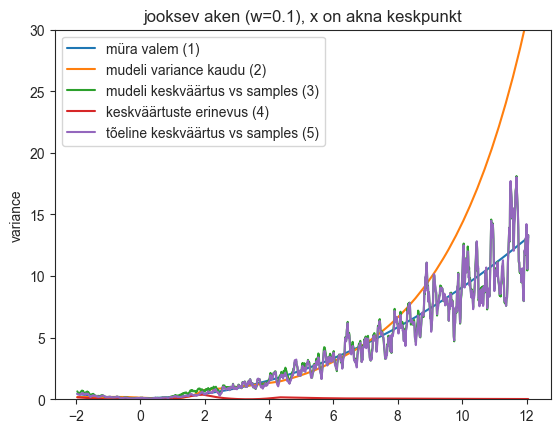

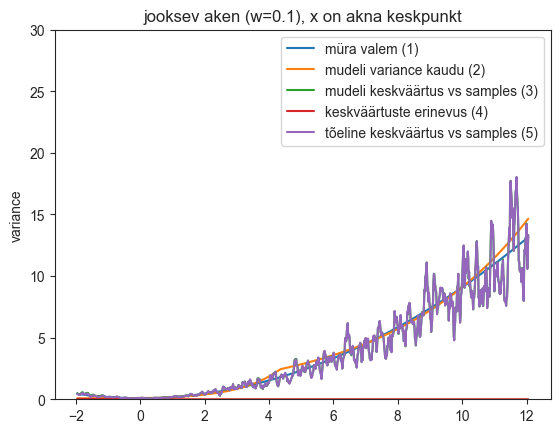

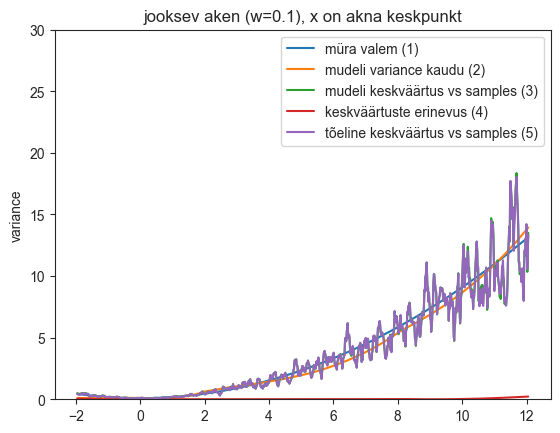

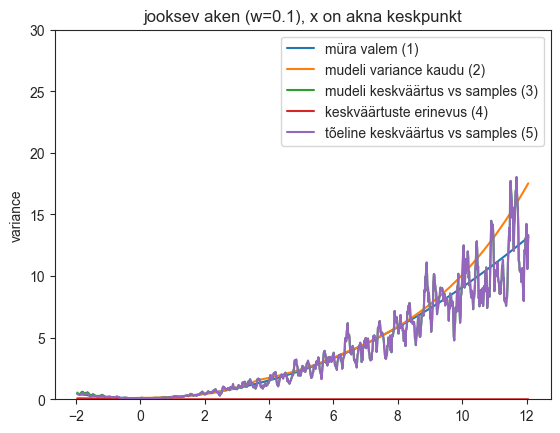

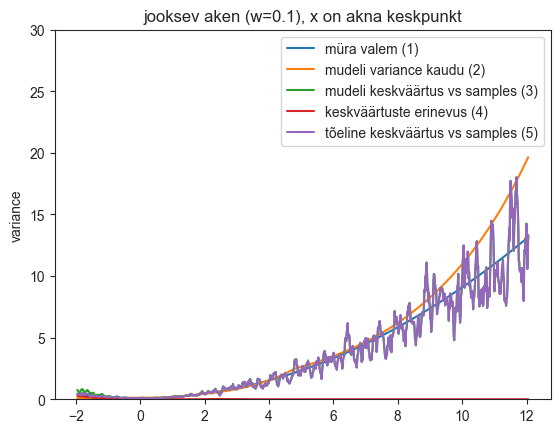

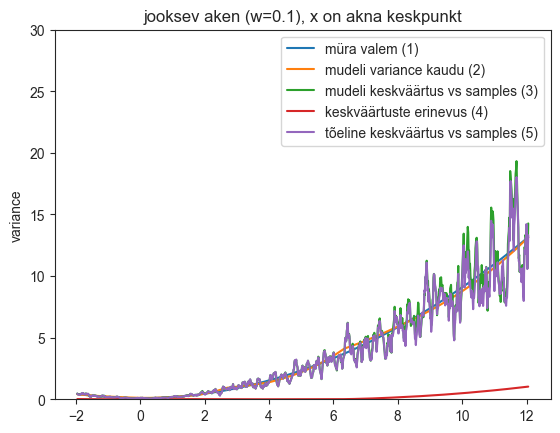

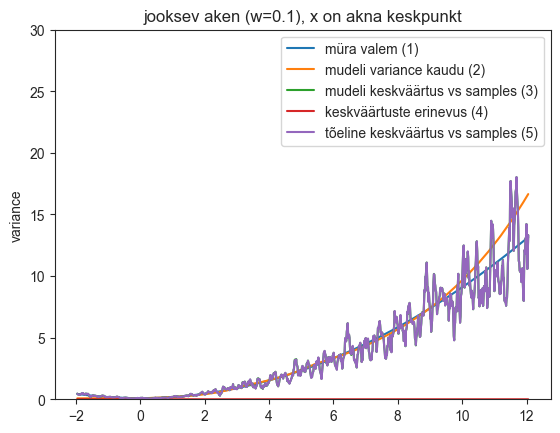

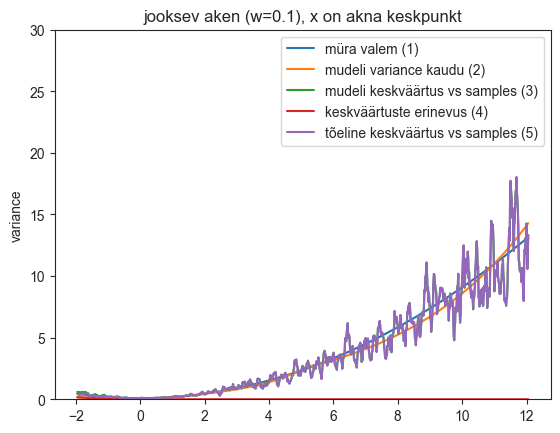

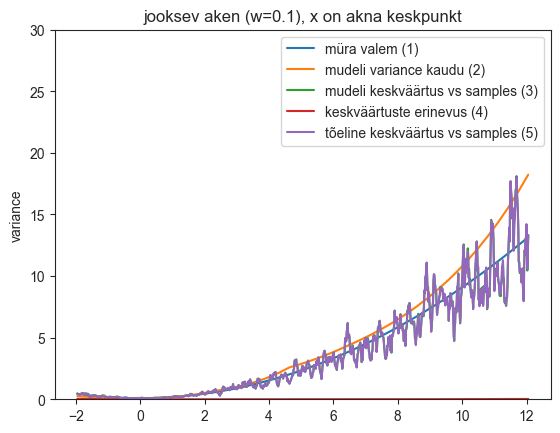

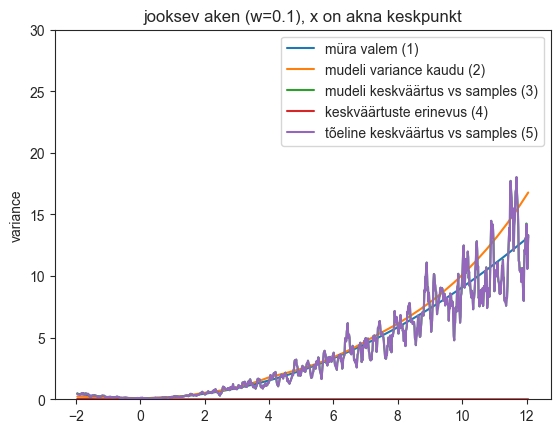

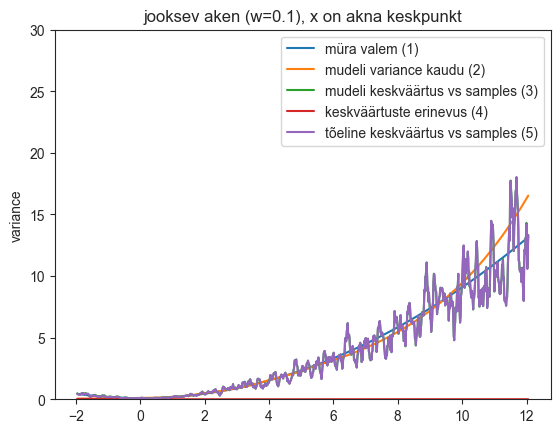

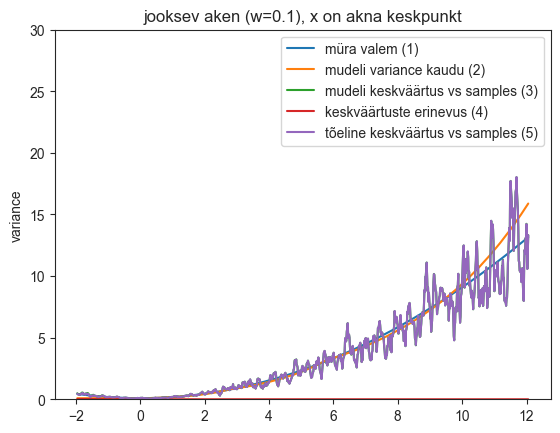

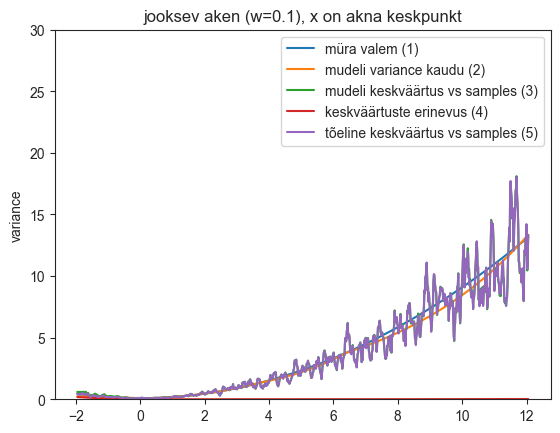

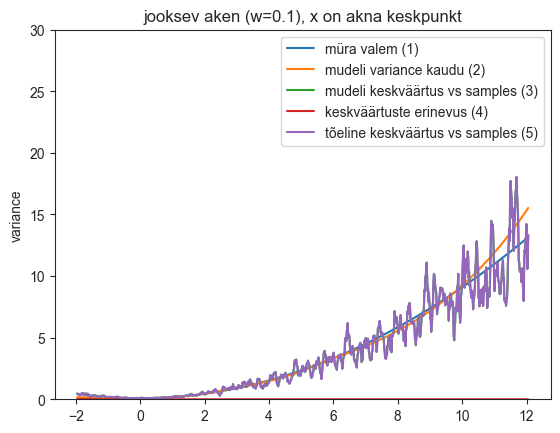

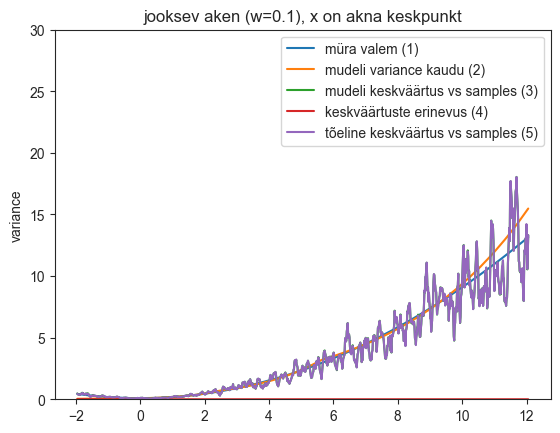

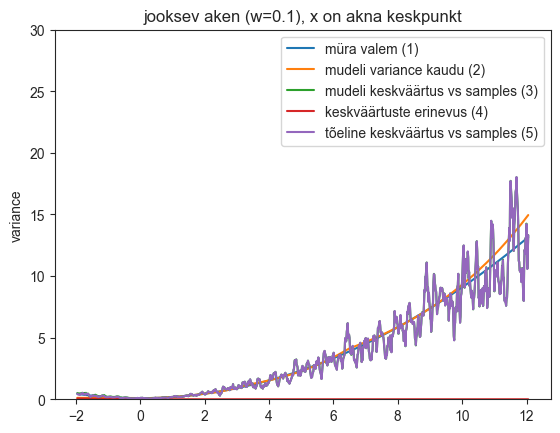

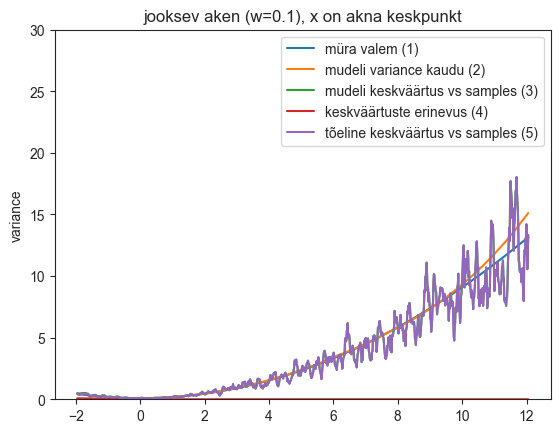

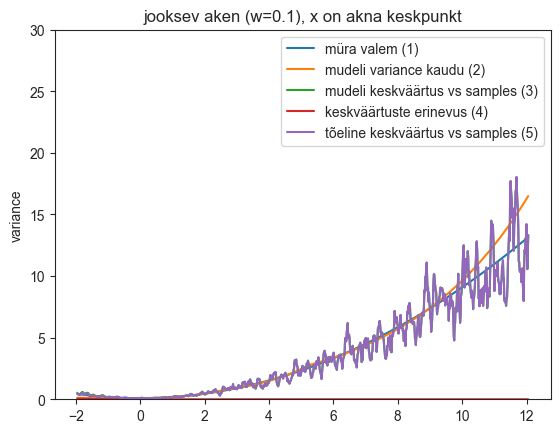

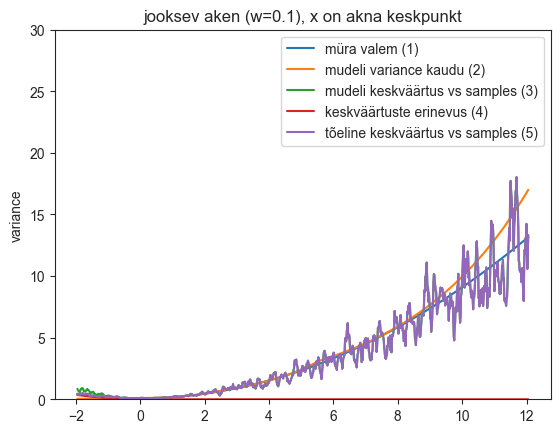

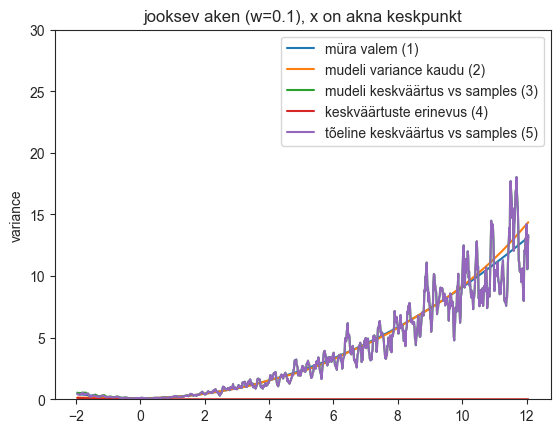

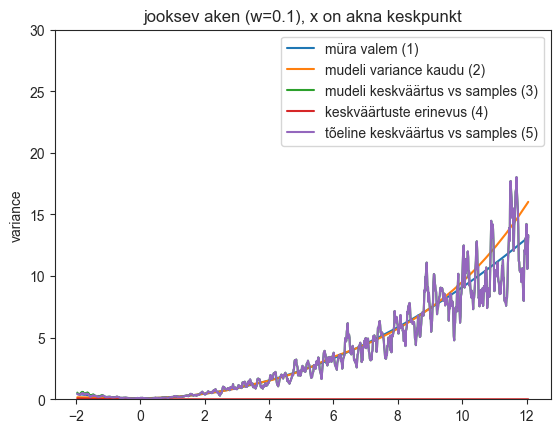

In [161]:
dset_sizes = [5, 10**1, 10**2, 10**3, 10**4, 10**5, 10**6]

opt = keras.optimizers.Adam(learning_rate=0.003, amsgrad=True, epsilon=1e-3)

param_dict = {
    5 :{
        'batch_size':2, 'epochs':1000,
    },
    10 : {
        'batch_size':4, 'epochs':1000,
    },
    100 : {
        'batch_size':16, 'epochs':1000,
    },
    1000 : {
        'batch_size':64, 'epochs':800,
    },
    10000 : {
        'batch_size':256, 'epochs':500,
    },
    100000 : {
        'batch_size':4096, 'epochs':300,
    },
    1000000 : {
        'batch_size':8192, 'epochs':300,
    },
}

korduv_treening_viga = []
korduv_test_viga = []
goal_test = 10**5

for dset_size in tqdm(dset_sizes):    # kõik suurused
    korduv_test_viga.append([])
    korduv_treening_viga.append([])
    for i in range(5):  # tõmbame kõiki eksperimente 5x
        x_train = np.linspace(0, 10,dset_size)

        m, h, (x_train, y_train, x_truth, ground_truth) = train_model_nb(x_train, **param_dict[dset_size], seed=None, optimizer=opt)

        rmses, fig = utils.joonista_rmses5x(m, start=-2, end=12, steps=1000, fn=fn, akna_laius=0.1, return_fig=True)

        # treening viga
        korduv_treening_viga[-1].append(m.evaluate(x_train, y_train, verbose=0))

        # test viga
        if len(x_train) < goal_test:
            uus_x = np.repeat(x_train, goal_test/len(x_train))
        else:
            uus_x = x_train
        y_test = fn(uus_x) + 0.3*np.random.randn(len(uus_x)) + 0.3*uus_x*np.random.randn(len(uus_x))
        viga = m.evaluate(uus_x, y_test, verbose=0)
        korduv_test_viga[-1].append(viga)

In [162]:
korduv_test_viga

[[791.6696166992188,
  3245.943603515625,
  956.1922607421875,
  3459.7392578125,
  565.9515991210938],
 [27.55252456665039,
  1033.6746826171875,
  735.055419921875,
  1046.2315673828125,
  508.9759521484375],
 [1.7378859519958496,
  1.7369948625564575,
  1.8172473907470703,
  1.5980746746063232,
  1.66602623462677],
 [1.5063396692276,
  1.5167039632797241,
  1.501175045967102,
  1.5080251693725586,
  1.5155173540115356],
 [1.500060796737671,
  1.503095030784607,
  1.507599115371704,
  1.5022028684616089,
  1.5006663799285889],
 [1.499151587486267,
  1.4994522333145142,
  1.4986720085144043,
  1.4987846612930298,
  1.498504877090454],
 [1.5001729726791382,
  1.5003149509429932,
  1.500651478767395,
  1.5002250671386719,
  1.5000909566879272]]

In [163]:
korduv_treening_viga

[[-3.9349570274353027,
  -2.9620444774627686,
  -2.079500436782837,
  -4.1841654777526855,
  -2.0145957469940186],
 [-0.083898164331913,
  -0.939322829246521,
  -1.745600700378418,
  -1.927382230758667,
  -1.8714993000030518],
 [1.3593388795852661,
  1.3076766729354858,
  1.5171194076538086,
  1.799810767173767,
  1.5155665874481201],
 [1.481062650680542,
  1.451536774635315,
  1.5303747653961182,
  1.5469167232513428,
  1.512749433517456],
 [1.4865005016326904,
  1.4961895942687988,
  1.5257004499435425,
  1.5166406631469727,
  1.5010854005813599],
 [1.5032187700271606,
  1.499748945236206,
  1.5062320232391357,
  1.508294701576233,
  1.497685194015503],
 [1.5014162063598633,
  1.503604531288147,
  1.5016965866088867,
  1.5003713369369507,
  1.503726601600647]]

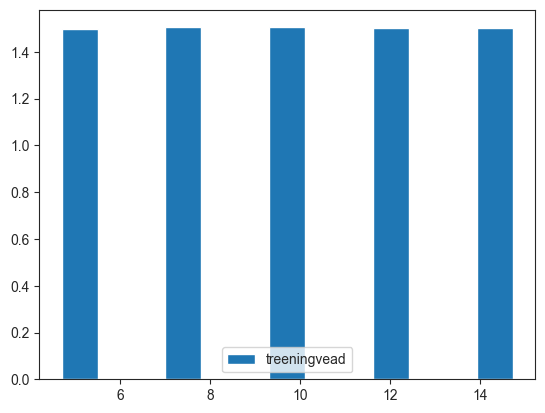

In [170]:
plt.bar(np.log(dset_sizes[2:])+0.5, np.mean(korduv_treening_viga[2:], axis=1), label="treeningvead")
plt.legend()

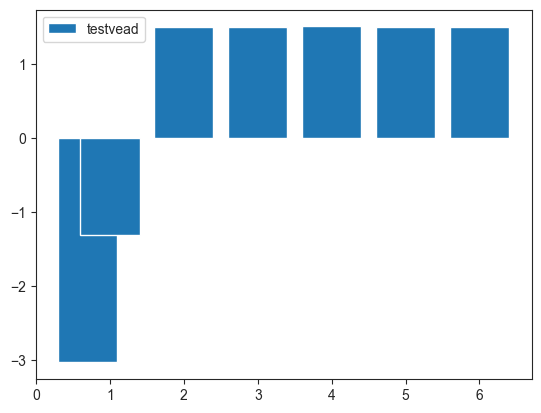

In [178]:
plt.bar(np.log10(dset_sizes), np.mean(korduv_treening_viga, axis=1), label="testvead")
plt.legend()

In [164]:
np.mean(korduv_treening_viga, axis=1)

array([-3.03505263, -1.31354064,  1.49990246,  1.50452807,  1.50522332,
        1.50303593,  1.50216305])

In [174]:
np.mean(korduv_test_viga, axis=1)

array([1.80389927e+03, 6.70298029e+02, 1.71124582e+00, 1.50955224e+00,
       1.50272484e+00, 1.49891307e+00, 1.50029109e+00])

In [168]:
np.var(korduv_treening_viga, axis=1)

array([8.18006139e-01, 5.05370970e-01, 2.94391308e-02, 1.17822874e-03,
       1.99788616e-04, 1.54675531e-05, 1.70163223e-06])

## Tulemus

In [185]:
print(f"{'dset':>20}, {'train error':>20}, {'var':>20}, {'test error':>20} {'var':>20}" )
for i in range(len(s_dset_sizes)):
    print(f"{dset_sizes[i]:>20}, {np.mean(korduv_treening_viga, axis=1)[i]:>20.6}, {np.var(korduv_treening_viga, axis=1)[i]:>20.6}, {np.mean(korduv_test_viga, axis=1)[i]:>20.6}, {np.var(korduv_test_viga, axis=1)[i]:>20.6}" )

                dset,          train error,                  var,           test error                  var
                   5,             -3.03505,             0.818006,               1803.9,          1.61941e+06
                  10,             -1.31354,             0.505371,              670.298,          1.43342e+05
                 100,               1.4999,            0.0294391,              1.71125,           0.00549231
                1000,              1.50453,           0.00117823,              1.50955,          3.39119e-05
               10000,              1.50522,          0.000199789,              1.50272,          7.10049e-06
              100000,              1.50304,          1.54676e-05,              1.49891,          1.17762e-07
             1000000,              1.50216,          1.70163e-06,              1.50029,          3.77627e-08


In [ ]:
tf.reduce_mean(y_pred_var + tf.math.square(y_true - y_pred_mean) / tf.math.exp(y_pred_var))

In [ ]:
valem = fn(X) + 0.3 * np.random.randn(len(X)) + 0.3 * X * np.random.randn(len(X))

In [197]:
xs = np.linspace(0, 10, 1000000)
temp = []
for x in xs:
    #0.09*x**2+0.09
    temp.append(np.log(0.09*x**2+0.09)  + (0.3*np.random.randn() + 0.3*x*np.random.randn())**2 / (0.09*x**2+0.09))
print(np.mean(temp))

1.5029456292111023
